In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [3]:
df.shape

(47587, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [5]:
df.isna().any().sum()

1

In [6]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [7]:
dfvm = df[df['Bairro'] == 'Vila Mariana']
dfvm

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
120,663,2476470173,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,350,540,3237,30,1,1,1,1,107.90
135,715,2469859736,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,140,680,3200,57,1,0,1,1,56.14
149,792,2479142664,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,170,800,4200,41,1,1,1,2,102.44
163,854,2477611940,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,710,130,3059,45,1,0,1,1,67.98
172,877,2469982229,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,90,710,3100,45,1,0,1,1,68.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47346,226163,2500265782,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,180,630,750,20,1,0,0,1,37.50
47367,226277,2500294097,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,159,0,1900,48,1,0,0,1,39.58
47387,226343,2500295287,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,159,0,1900,40,1,1,0,1,47.50
47476,226783,2500389738,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,242,1480,2200,35,1,0,1,1,62.86


In [8]:
dfvm['Area_Privativa'].describe()

count    1945.000000
mean       54.134190
std        61.461395
min        10.000000
25%        36.000000
50%        43.000000
75%        50.000000
max       720.000000
Name: Area_Privativa, dtype: float64

In [9]:
dfvm['Aluguel_m2'].describe()

count    1945.000000
mean       61.394437
std        50.410227
min        13.890000
25%        41.110000
50%        58.000000
75%        74.750000
max      2000.000000
Name: Aluguel_m2, dtype: float64

In [10]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [11]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [12]:
limites(dfvm['Area_Privativa'])

(15.0, 71.0)

In [13]:
limites(dfvm['Aluguel_m2'])

(-9.350000000000001, 125.21000000000001)

In [14]:
limites(dfvm['Valor_Aluguel'])

(0.0, 4800.0)

In [15]:
# Coletando a mediana e o Q3 da tabela df para cercear o estudo nos imóveis entre os Q2 e Q3

medianavm = np.percentile(dfvm.Aluguel_m2, 50)
q3vm = np.percentile(dfvm.Aluguel_m2, 75)
print(medianavm)
print(q3vm)

58.0
74.75


In [16]:
vm_ = dfvm[(dfvm.Aluguel_m2 >= medianavm) & (dfvm.Aluguel_m2 <= q3vm)]
df_vm = pd.DataFrame(data=vm_)
display(df_vm)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
163,854,2477611940,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,710,130,3059,45,1,0,1,1,67.98
172,877,2469982229,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,90,710,3100,45,1,0,1,1,68.89
243,1315,2476963809,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,150,510,2600,36,1,0,1,1,72.22
244,1317,2477149885,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,100,900,2200,33,1,0,1,1,66.67
380,2116,2477752726,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,200,1300,2100,30,1,1,1,1,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45519,217630,2499205252,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,186,674,3000,41,1,0,2,2,73.17
45537,217697,2499209924,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,55,730,2800,40,1,0,1,1,70.00
45560,217799,2499235388,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,0,0,1200,20,1,0,0,1,60.00
45728,218580,2499405187,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,30,515,2150,33,1,0,1,1,65.15


In [17]:
df_vm['Area_Privativa'].describe()

count    490.000000
mean      43.595918
std       14.553336
min       17.000000
25%       37.000000
50%       42.000000
75%       47.750000
max      180.000000
Name: Area_Privativa, dtype: float64

In [18]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

limites(df_vm['Area_Privativa'])

(20.875, 63.875)

In [19]:
df_vm = df_vm[df_vm.Area_Privativa <= 63.875]
df_vm

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
163,854,2477611940,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,710,130,3059,45,1,0,1,1,67.98
172,877,2469982229,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,90,710,3100,45,1,0,1,1,68.89
243,1315,2476963809,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,150,510,2600,36,1,0,1,1,72.22
244,1317,2477149885,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,100,900,2200,33,1,0,1,1,66.67
380,2116,2477752726,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,200,1300,2100,30,1,1,1,1,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45519,217630,2499205252,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,186,674,3000,41,1,0,2,2,73.17
45537,217697,2499209924,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,55,730,2800,40,1,0,1,1,70.00
45560,217799,2499235388,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,0,0,1200,20,1,0,0,1,60.00
45728,218580,2499405187,Zap Imóveis,Vila Mariana,Zona Sul,São Paulo,Aluguel,30,515,2150,33,1,0,1,1,65.15


In [20]:
datavm = df_vm.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
datavm.replace(np.nan, 0, inplace=True)
display(datavm)

,min,max,mean,std,size
Area_Privativa,,,,,
17,58.82,58.82,58.820000,0.000000,2
20,60.00,72.50,66.668750,5.121798,8
22,70.00,73.64,71.213333,2.101555,3
23,70.00,70.00,70.000000,0.000000,1
25,60.00,68.00,63.500000,3.630677,12
27,60.74,61.11,60.925000,0.261630,2
30,58.33,73.33,65.525263,5.445534,19
31,74.19,74.19,74.190000,0.000000,1
33,59.55,72.73,67.122308,3.530432,13


In [21]:
datavm_ = df_vm.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
datavm_.replace(np.nan, 0, inplace=True)
display(datavm_)

,min,max,mean,std,size
Area_Privativa,,,,,
17,1000,1000,1000.000000,0.000000,2
20,1200,1450,1333.375000,102.435956,8
22,1540,1620,1566.666667,46.188022,3
23,1610,1610,1610.000000,0.000000,1
25,1500,1700,1587.500000,90.766934,12
27,1640,1650,1645.000000,7.071068,2
30,1750,2200,1965.789474,163.344074,19
31,2300,2300,2300.000000,0.000000,1
33,1965,2400,2215.000000,116.529681,13


In [22]:
def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

<Figure size 1440x720 with 0 Axes>

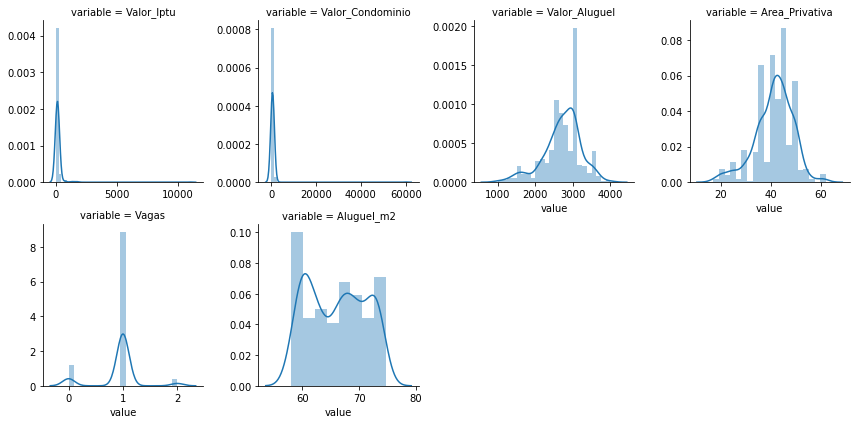

In [23]:
plt.figure(figsize=(20,10))
hist_col_num(df_vm, df_vm[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '17'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '25'),
  Text(5, 0, '27'),
  Text(6, 0, '30'),
  Text(7, 0, '31'),
  Text(8, 0, '33'),
  Text(9, 0, '34'),
  Text(10, 0, '35'),
  Text(11, 0, '36'),
  Text(12, 0, '37'),
  Text(13, 0, '38'),
  Text(14, 0, '39'),
  Text(15, 0, '40'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '44'),
  Text(20, 0, '45'),
  Text(21, 0, '46'),
  Text(22, 0, '47'),
  Text(23, 0, '48'),
  Text(24, 0, '49'),
  Text(25, 0, '50'),
  Text(26, 0, '51'),
  Text(27, 0, '52'),
  Text(28, 0, '53'),
  Text(29, 0, '55'),
  Text(30, 0, '56'),
  Text(31, 0, '60'),
  Text(32, 0, '61'),
  Text(33, 0, '62')])

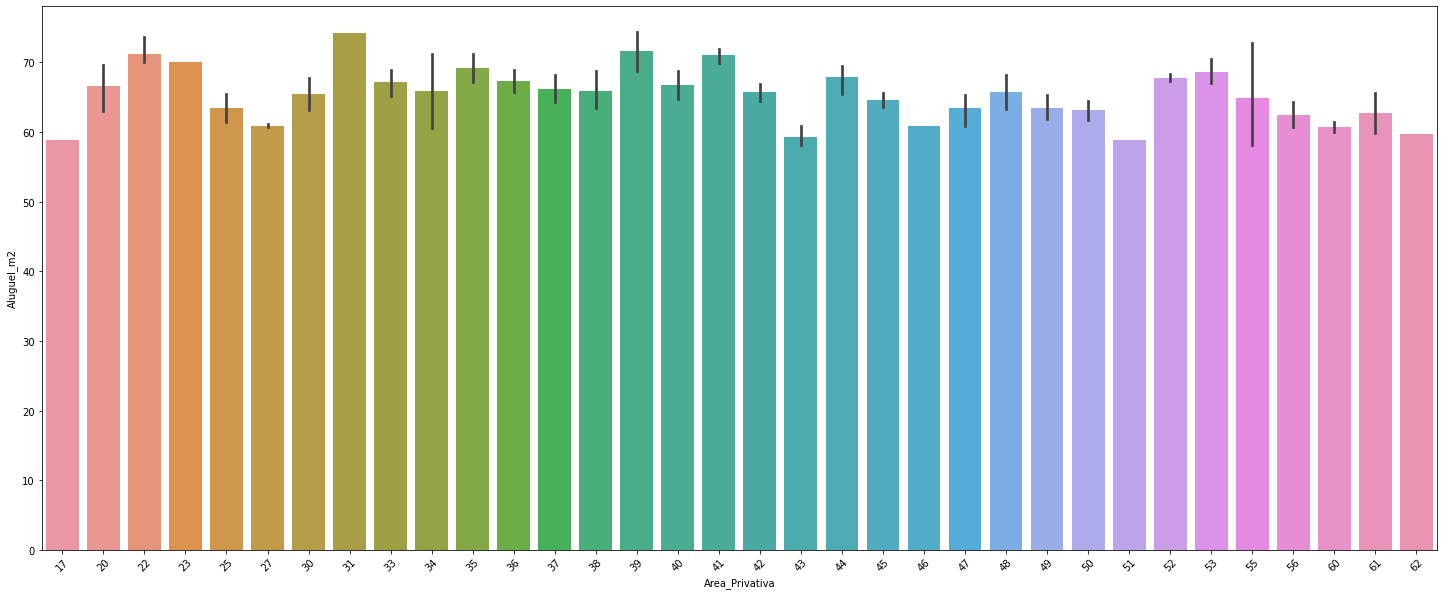

In [24]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_vm['Area_Privativa'], y = df_vm['Aluguel_m2'])
plt.xticks(rotation=45)

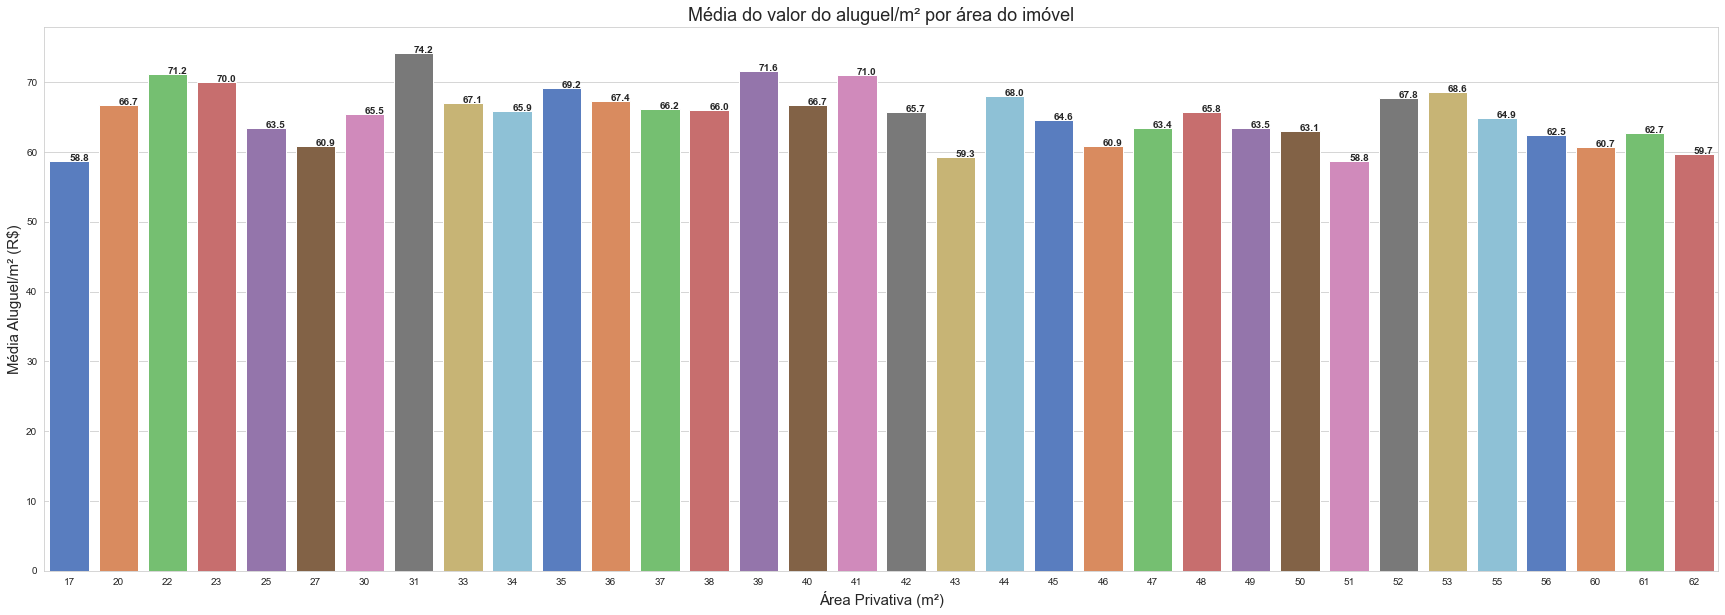

In [25]:
data_vm = df_vm.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=data_vm.index, y='media', data=data_vm, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

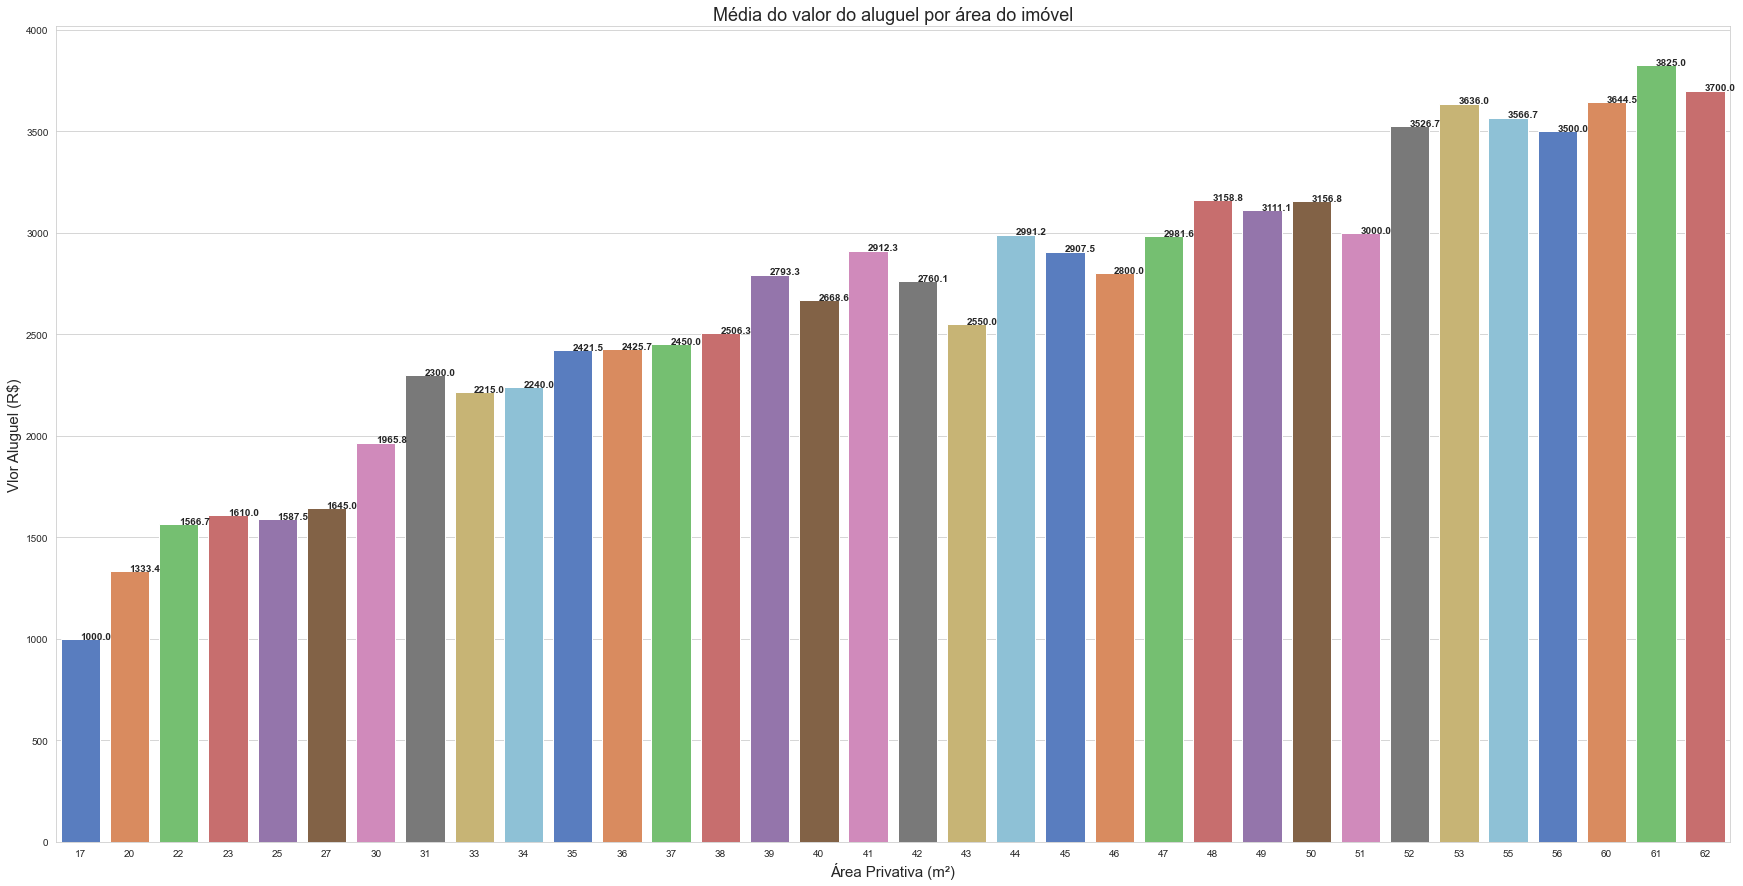

In [26]:
data_vm_ = df_vm.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=data_vm_.index, y='media', data=data_vm_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )